C:\Users\Gaya\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\Gaya\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


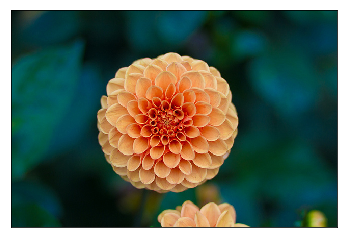

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import numpy as np
china=load_sample_image('flower.jpg')
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china);

In [4]:
china.shape

(427, 640, 3)

In [7]:
data=china/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [8]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [14]:
def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
    
    #choose a random subset
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R, G, B=data[i].T
    
    fig, ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B, color=colors, marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=20);

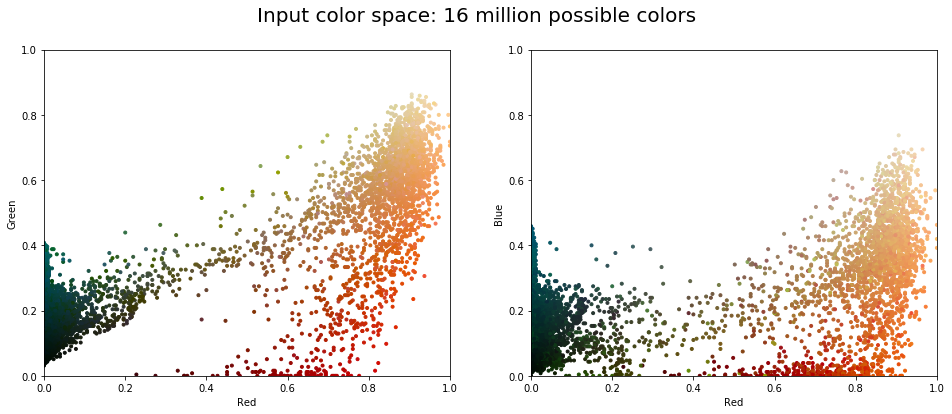

In [15]:
plot_pixels(data,title='Input color space: 16 million possible colors')

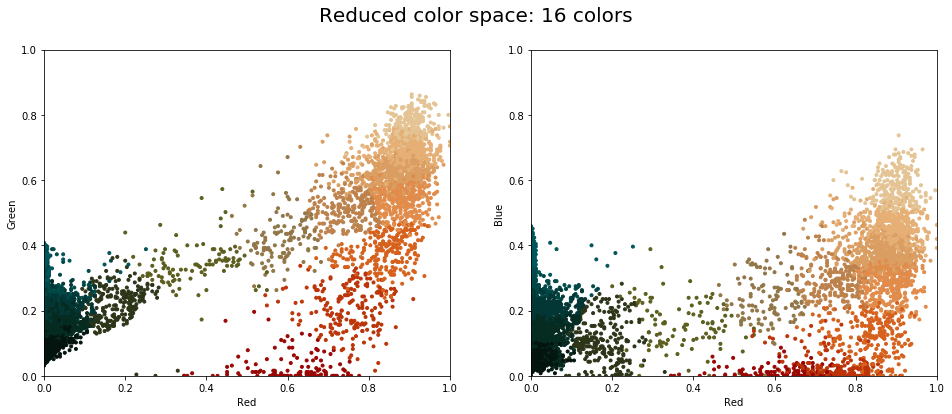

In [20]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans

kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors=new_colors,
           title='Reduced color space: 16 colors')

Text(0.5,1,'16-color Image')

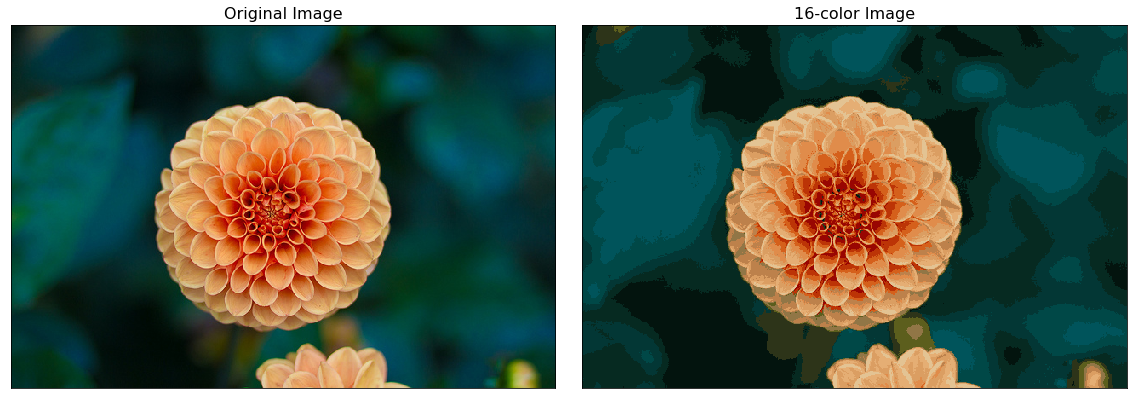

In [22]:
china_recolored=new_colors.reshape(china.shape)

fig, ax=plt.subplots(1,2,figsize=(20,8),
                    subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image',size=16)

# China temple

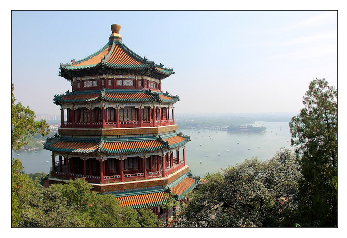

In [25]:
from sklearn.datasets import load_sample_image
%matplotlib inline
china=load_sample_image('china.jpg')
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china);

In [26]:
china.shape

(427, 640, 3)

In [27]:
data=china/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

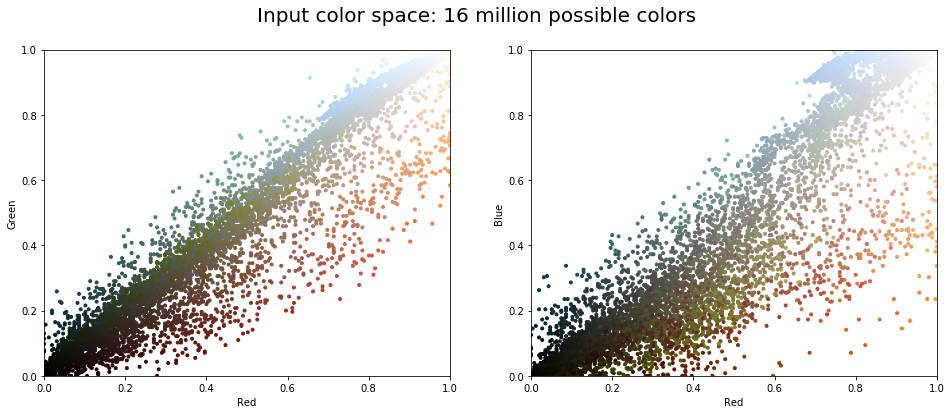

In [28]:
plot_pixels(data,title='Input color space: 16 million possible colors')

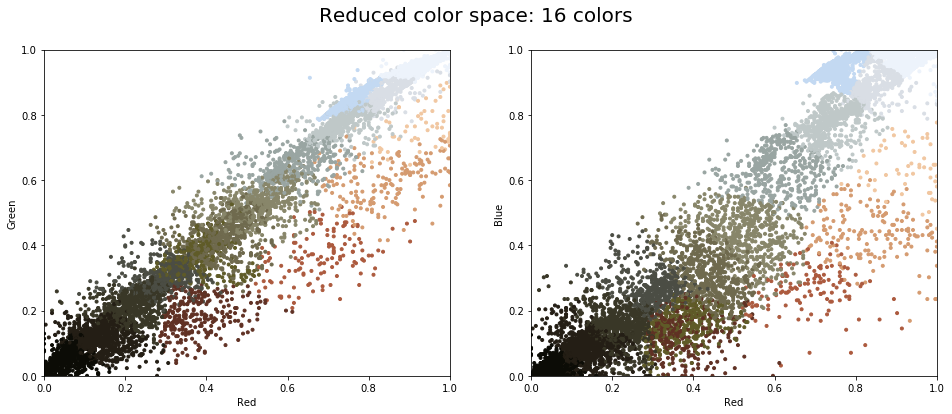

In [29]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans

kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors=new_colors,
           title='Reduced color space: 16 colors')

Text(0.5,1,'16-color Image')

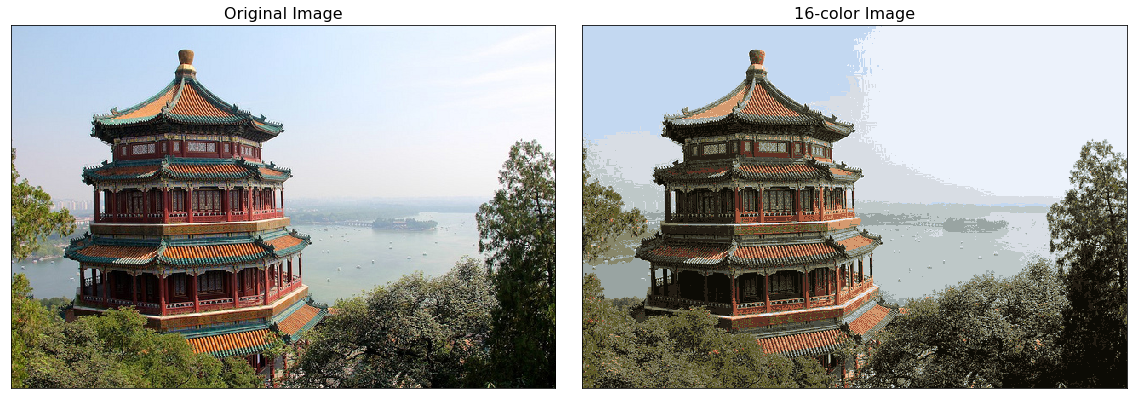

In [30]:
china_recolored=new_colors.reshape(china.shape)

fig, ax=plt.subplots(1,2,figsize=(20,8),
                    subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image',size=16)